In [9]:
fldr="/content/drive/MyDrive/project/UTKFace"

In [10]:
import os
files=os.listdir(fldr)
print(files)

['7_1_0_20170109205404516.jpg.chip.jpg', '74_1_0_20170110122923277.jpg.chip.jpg', '78_0_0_20170111222218304.jpg.chip.jpg', '9_0_0_20170110220312322.jpg.chip.jpg', '80_1_0_20170117175552763.jpg.chip.jpg', '7_0_0_20170110215615139.jpg.chip.jpg', '89_1_3_20170110182042731.jpg.chip.jpg', '75_0_3_20170112205612628.jpg.chip.jpg', '9_0_0_20170110220241330.jpg.chip.jpg', '90_1_0_20170110175843628.jpg.chip.jpg', '8_0_3_20170104230744745.jpg.chip.jpg', '79_0_0_20170111222200062.jpg.chip.jpg', '85_1_0_20170110183711497.jpg.chip.jpg', '87_1_0_20170110183746742.jpg.chip.jpg', '75_1_0_20170110180500719.jpg.chip.jpg', '8_1_3_20170104221914568.jpg.chip.jpg', '92_1_0_20170110182402526.jpg.chip.jpg', '75_0_3_20170111210912724.jpg.chip.jpg', '90_1_1_20170120220828835.jpg.chip.jpg', '80_0_0_20170111211700924.jpg.chip.jpg', '90_0_3_20170111210252274.jpg.chip.jpg', '90_1_0_20170120221911645.jpg.chip.jpg', '90_0_0_20170111222418306.jpg.chip.jpg', '9_0_0_20170110225419379.jpg.chip.jpg', '75_0_0_20170117174423

In [12]:
import cv2
ages=[]
genders=[]
images=[]
c=0
for fle in files:
    
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    
    ages.append(age)
    genders.append(gender)
    total=fldr+'/'+fle
    #print(total)
    image=cv2.imread(total)
      
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image= cv2.resize(image,(48,48))
    images.append(image)
    print(c)
    c=c+1

Streaming output truncated to the last 5000 lines.
18718
18719
18720
18721
18722
18723
18724
18725
18726
18727
18728
18729
18730
18731
18732
18733
18734
18735
18736
18737
18738
18739
18740
18741
18742
18743
18744
18745
18746
18747
18748
18749
18750
18751
18752
18753
18754
18755
18756
18757
18758
18759
18760
18761
18762
18763
18764
18765
18766
18767
18768
18769
18770
18771
18772
18773
18774
18775
18776
18777
18778
18779
18780
18781
18782
18783
18784
18785
18786
18787
18788
18789
18790
18791
18792
18793
18794
18795
18796
18797
18798
18799
18800
18801
18802
18803
18804
18805
18806
18807
18808
18809
18810
18811
18812
18813
18814
18815
18816
18817
18818
18819
18820
18821
18822
18823
18824
18825
18826
18827
18828
18829
18830
18831
18832
18833
18834
18835
18836
18837
18838
18839
18840
18841
18842
18843
18844
18845
18846
18847
18848
18849
18850
18851
18852
18853
18854
18855
18856
18857
18858
18859
18860
18861
18862
18863
18864
18865
18866
18867
18868
18869
18870
18871
18872
18873
18874
18875
1

In [ ]:
ages=[]
genders=[]
for fle in files:
  
    age=int(fle.split('_')[0])
    gender=int(fle.split('_')[1])
    ages.append(age)
    genders.append(gender)
    


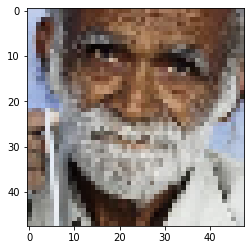

In [13]:
from matplotlib import pyplot as plt
plt.imshow(images[20])

In [14]:
print(ages[20])
print(genders[20])


90
0


In [15]:
import numpy as np
images_f=np.array(images)
genders_f=np.array(genders)
ages_f=np.array(ages)

In [ ]:
np.save(fldr+'image.npy',images_f)
np.save(fldr+'gender.npy',genders_f)
np.save(fldr+'age.npy',ages_f)

In [16]:
values, counts = np.unique(genders_f, return_counts=True)
print(counts)

[12401 11317]


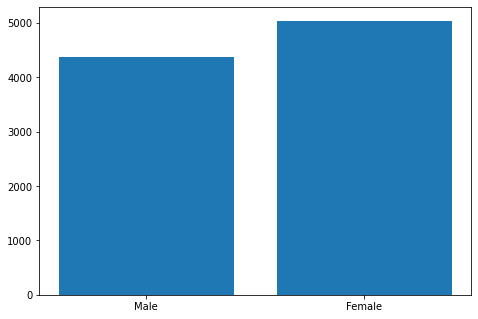

In [17]:

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male', 'Female']
values=[4372,5047]
ax.bar(gender,values)
plt.show()

In [18]:
values, counts = np.unique(ages_f, return_counts=True)
print(counts)

[1123  482  289  273  196  131  139  263  166  156   65  130   81  157
  177  247  158  262   98  284  346  395  426  859  734 2197  615  918
  570  724  350  664  143  409  880  483  303  325  266  526  132  266
  157  100  440  153  170  153  148  381  138  232  241  353  268  236
   97  271   82  293  161  125  103   50  259   77   94  100   56  147
   33   98   63   32  148   58   28   69   23  133   22   40   18   24
  155   35   10   34   33   82    2   13    5    9   17    9   11    2
    1    5    5    1    3    4]


In [19]:
val=values.tolist()
cnt=counts.tolist()

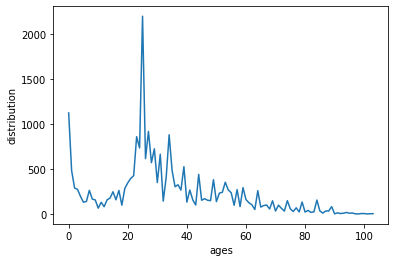

In [20]:
plt.plot(counts)
plt.xlabel('ages')
plt.ylabel('distribution')
plt.show()

In [21]:
labels=[]

i=0
while i<len(ages):
    
    label=[]
    label.append([ages[i]])
    label.append([genders[i]])
    labels.append(label)
    i+=1

In [22]:
images_f_2=images_f/255
labels_f=np.array(labels)
images_f_2.shape

(23718, 48, 48, 3)

In [23]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test= train_test_split(images_f_2, labels_f,test_size=0.20)

In [25]:
Y_train[0:5]

array([[[72],
        [ 0]],

       [[26],
        [ 1]],

       [[32],
        [ 1]],

       [[36],
        [ 1]],

       [[30],
        [ 1]]])

In [26]:
Y_train_2=[Y_train[:,1],Y_train[:,0]]
Y_test_2=[Y_test[:,1],Y_test[:,0]]

In [27]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten,BatchNormalization
from tensorflow.keras.layers import Dense, MaxPooling2D,Conv2D
from tensorflow.keras.layers import Input,Activation,Add
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def Convolution(input_tensor,filters):
    
    x = Conv2D(filters=filters,kernel_size=(3, 3),padding = 'same',strides=(1, 1),kernel_regularizer=l2(0.001))(input_tensor)
    x = Dropout(0.1)(x)
    x= Activation('relu')(x)

    return x
def model(input_shape):
    inputs = Input((input_shape))

    conv_1= Convolution(inputs,32)
    maxp_1 = MaxPooling2D(pool_size = (2,2)) (conv_1)
    conv_2 = Convolution(maxp_1,64)
    maxp_2 = MaxPooling2D(pool_size = (2, 2)) (conv_2)
    conv_3 = Convolution(maxp_2,128)
    maxp_3 = MaxPooling2D(pool_size = (2, 2)) (conv_3)
    conv_4 = Convolution(maxp_3,256)
    maxp_4 = MaxPooling2D(pool_size = (2, 2)) (conv_4)
    conv_5=  Convolution(inputs,512)
    max_p = MaxPooling2D(pool_size=(2,2)) (conv_5)
    flatten= Flatten() (maxp_4)
    dense_1= Dense(64,activation='relu')(flatten)
    dense_2= Dense(64,activation='relu')(flatten)
    drop_1=Dropout(0.2)(dense_1)
    drop_2=Dropout(0.2)(dense_2)
    output_1= Dense(1,activation="sigmoid",name='sex_out')(drop_1)
    output_2= Dense(1,activation="softmax",name='age_out')(drop_2)
    model = Model(inputs=[inputs], outputs=[output_1,output_2])
    model.compile(loss=["binary_crossentropy","mae"], optimizer="Adam",metrics=["accuracy"])

    return model

In [28]:
Model=model((48,48,3))

In [29]:

Model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 48, 48, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 48, 48, 32)   896         input_1[0][0]                    
__________________________________________________________________________________________________
dropout (Dropout)               (None, 48, 48, 32)   0           conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 48, 48, 32)   0           dropout[0][0]                    
______________________________________________________________________________________________

In [30]:
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

In [31]:
fle_s='New_Age_sex_detection.h5'
checkpointer = ModelCheckpoint(fle_s, monitor='val_loss',verbose=1,save_best_only=True,save_weights_only=False, mode='auto',save_freq='epoch')
Early_stop=tf.keras.callbacks.EarlyStopping(patience=75, monitor='val_loss',restore_best_weights=True),
callback_list=[checkpointer,Early_stop]

In [ ]:
History=Model.fit(X_train,Y_train_2,batch_size=64,validation_data=(X_test,Y_test_2),epochs=500,callbacks=[callback_list])

Epoch 1/500
297/297 [==============================] - 161s 536ms/step - loss: 32.6353 - sex_out_loss: 0.6141 - age_out_loss: 31.9030 - sex_out_accuracy: 0.6562 - age_out_accuracy: 0.0497 - val_loss: 32.8830 - val_sex_out_loss: 0.3865 - val_age_out_loss: 32.4380 - val_sex_out_accuracy: 0.8411 - val_age_out_accuracy: 0.0474

Epoch 00001: val_loss improved from inf to 32.88296, saving model to New_Age_sex_detection.h5
Epoch 2/500
297/297 [==============================] - 159s 535ms/step - loss: 32.5608 - sex_out_loss: 0.3582 - age_out_loss: 32.1437 - sex_out_accuracy: 0.8451 - age_out_accuracy: 0.0475 - val_loss: 32.8290 - val_sex_out_loss: 0.3322 - val_age_out_loss: 32.4380 - val_sex_out_accuracy: 0.8508 - val_age_out_accuracy: 0.0474

Epoch 00002: val_loss improved from 32.88296 to 32.82899, saving model to New_Age_sex_detection.h5
Epoch 3/500
297/297 [==============================] - 158s 533ms/step - loss: 32.7181 - sex_out_loss: 0.3147 - age_out_loss: 32.3443 - sex_out_accuracy: 0

In [ ]:
Model.evaluate(X_test,Y_test_2)

75/75 [==============================] - 2s 27ms/step - loss: 7.2328 - sex_out_loss: 0.2508 - age_out_loss: 6.0722 - sex_out_accuracy: 0.8920 - age_out_accuracy: 0.0489


[7.232753753662109,
 0.2508453130722046,
 6.072193145751953,
 0.8920286893844604,
 0.04892450571060181]

In [ ]:
pred=Model.predict(X_test)

In [ ]:
pred[1]

array([[ 1.5387936],
       [53.10508  ],
       [32.23716  ],
       ...,
       [24.258009 ],
       [42.9188   ],
       [15.799988 ]], dtype=float32)

#savemodel

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

# serialize to JSON
import pandas
import json
json_file = Model.to_json()
with open("json_file", "w") as file:
    file.write(json_file)
# serialize weights to HDF5
Model.save_weights("trained.h5")

In [ ]:
import keras
loaded_model=keras.models.load_model("New_Age_sex_detection.h5")

In [ ]:
from keras.models import model_from_json
# load json and create model
file = open("json_file", 'r',errors='ignore')
model_json = file.read()
file.close()
loaded_model = model_from_json(model_json)
# load weights
loaded_model.load_weights("trained.h5")

In [ ]:
def test_image(ind,images_f,images_f_2,loaded_model):
    plt.imshow(images_f[ind])
    image_test=images_f_2[ind]
    pred_1=loaded_model.predict(np.array([image_test]))
    #print(pred_1)
    sex_f=['Male','Female']
    age=int(np.round(pred_1[1][0]))
    sex=int(np.round(pred_1[0][0]))
    print("Predicted Age: "+ str(age))
    print("Predicted Sex: "+ sex_f[sex])
    

Predicted Age: 13
Predicted Sex: Male


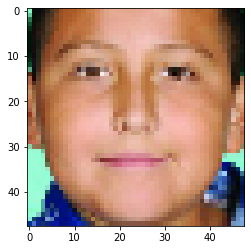

In [ ]:
test_image(105,images_f,images_f_2,loaded_model)

Predicted Age: 32
Predicted Sex: Male


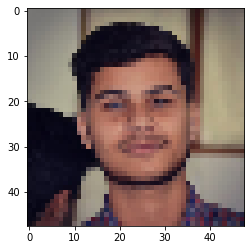

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
im_t="tstim.jpg"
image1=cv2.imread(im_t)
image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
image1= cv2.resize(image1,(48,48))
im=np.array(image1)
im2=im/255
plt.imshow(im)
pred_1=loaded_model.predict(np.array([im2]))
#print(pred_1)
sex_f=['Male','Female']
age=int(np.round(pred_1[1][0]))
sex=int(np.round(pred_1[0][0]))
print("Predicted Age: "+ str(age))
print("Predicted Sex: "+ sex_f[sex])

In [ ]:
im.shape


(48, 48, 3)